# Validating modelled tide heights

[![Download Jupyter Notebook](https://img.shields.io/badge/Jupyter%20Notebook-Download%20on%20GitHub-F37626?logo=jupyter&logoColor=white)](https://github.com/GeoscienceAustralia/eo-tides/blob/main/docs/notebooks/Validating_tides.ipynb)
[![Python API Reference](https://img.shields.io/badge/Python-API%20Reference-3776AB?logo=python&logoColor=white)](../../api/#eo_tides.validation)

**This guide demonstrates how to use the [`load_gauge_gesla`](../../api/#eo_tides.validation.load_gauge_gesla) and [`tide_correlation`](../../api/#eo_tides.validation.tide_correlation) functions from [`eo_tides.validation`](../../api/#eo_tides.validation) to validate modelled tides from `eo-tides`.**

---

The tide models used by `eo-tides` can vary significantly in accuracy across the world's coastlines. 
Evaluating the accuracy of your modelled tides is critical for ensuring that resulting marine or coastal EO analyses are reliable and useful.

The `load_gauge_gesla` function provides a convenient tool for loading high-quality sea-level measurements from the [GESLA Global Extreme Sea Level Analysis archive](https://gesla.org/) – a global archive of almost 127,623 years of sea level data from 6,474 records across the world.
This data can be used to compare against tides modelled using `eo-tides` to calculate the accuracy of your tide modelling and identify the optimal tide models to use for your study area.

The `tide_correlation` provides a novel remote sensing approach to rank tide models by performance based on their correlation with satellite-observed patterns of inundation. 
This can be particularly useful for identifying optimal tidal models at locations far from the nearest tide gauge.
This approach is used to inform more complex analysis tools like ensemble tide modelling in [`model_tides`](../../api/#eo_tides.model.model_tides).


## Getting started
As in the previous examples, our first step is to tell `eo-tides` the location of our tide model directory (if you haven't set this up, [refer to the setup instructions here](../../setup)):

In [1]:
directory = "../../tests/data/tide_models/"

## Tide gauge validation


### Loading GESLA tide gauge data

To evaluate the accuracy of our tide models, we first load a time series of measured sea-level data from a GESLA tide gauge using `eo_tides.validation.load_gauge_gesla`.

To obtain GESLA data, you will need to download both **"GESLA-4 DATA"** (`GESLA4_ALL.zip`) and **"GESLA-4 CSV META-DATA FILE"** (`GESLA4_ALL.csv`) from the [Downloads page of the GESLA website](https://gesla787883612.wordpress.com/downloads/), and save and extract these to a convenient location.

We have provided an example below; replace these paths to point to your downloaded data.

In [2]:
gesla_data_path = "../../tests/data/GESLA4_ALL/"
gesla_metadata_path = "../../tests/data/GESLA4_ALL.csv"

To load GESLA data, we can pass in `x` and `y` coordinates (and optionally time period). 
In this example, the function will load one month (**January 2014**) of tide data for the nearest available GESLA tide gauge to the coastal town of **Derby, Western Australia**.

<div class="admonition tip">
    <p class="admonition-title">Tip</p>
    <p>
        Pass a set of bounding box tuples (e.g. <code>x=(120, 130), y=(-20, -30)</code> to return all tide gauges within a bounding box instead.
    </p>
</div>

In [3]:
from eo_tides.validation import load_gauge_gesla

x, y = 123.606725, -17.291899

# Load gauge data
gauge_df = load_gauge_gesla(
    x=x,
    y=y,
    time=("2014-01", "2014-01"),
    correct_mean=True,
    data_path=gesla_data_path,
    metadata_path=gesla_metadata_path,
)
gauge_df.head()

Loading GESLA gauges: 100%|██████████| 1/1 [00:00<00:00, 44.60it/s]


sea_level  qc_flag  use_flag  \
site_code time                                                
DYDBY01   2014-01-01 02:00:00   -3.51346        1         1   
          2014-01-01 03:00:00   -1.16346        1         1   
          2014-01-01 04:00:00    0.83654        1         1   
          2014-01-01 05:00:00    2.42654        1         1   
          2014-01-01 06:00:00    3.04654        1         1   

                                                                       file_name  \
site_code time                                                                     
DYDBY01   2014-01-01 02:00:00  ../../tests/data/GESLA4_ALL/derby-dydby01-aus-bom   
          2014-01-01 03:00:00  ../../tests/data/GESLA4_ALL/derby-dydby01-aus-bom   
          2014-01-01 04:00:00  ../../tests/data/GESLA4_ALL/derby-dydby01-aus-bom   
          2014-01-01 05:00:00  ../../tests/data/GESLA4_ALL/derby-dydby01-aus-bom   
          2014-01-01 06:00:00  ../../tests/data/GESLA4_ALL/derby-dydby01-aus-bom   

                              site_name country contributor_abbreviated  \
site_code time                                                            
DYDBY01   2014-01-01 02:00:00     Derby     AUS                     BOM   
          2014-01-01 03:00:00     Derby     AUS                     BOM   
          2014-01-01 04:00:00     Derby     AUS                     BOM   
          2014-01-01 05:00:00     Derby     AUS                     BOM   
          2014-01-01 06:00:00     Derby     AUS                     BOM   

                                    contributor_full  \
site_code time                                         
DYDBY01   2014-01-01 02:00:00  Bureau of Meteorology   
          2014-01-01 03:00:00  Bureau of Meteorology   
          2014-01-01 04:00:00  Bureau of Meteorology   
          2014-01-01 05:00:00  Bureau of Meteorology   
          2014-01-01 06:00:00  Bureau of Meteorology   

                                                             contributor_website  \
site_code time                                                                     
DYDBY01   2014-01-01 02:00:00  http://www.bom.gov.au/oceanography/projects/nt...   
          2014-01-01 03:00:00  http://www.bom.gov.au/oceanography/projects/nt...   
          2014-01-01 04:00:00  http://www.bom.gov.au/oceanography/projects/nt...   
          2014-01-01 05:00:00  http://www.bom.gov.au/oceanography/projects/nt...   
          2014-01-01 06:00:00  http://www.bom.gov.au/oceanography/projects/nt...   

                              contributor_contact  ...      start_date_time  \
site_code time                                     ...                        
DYDBY01   2014-01-01 02:00:00    tides@bom.gov.au  ...  1982/04/25 03:00:00   
          2014-01-01 03:00:00    tides@bom.gov.au  ...  1982/04/25 03:00:00   
          2014-01-01 04:00:00    tides@bom.gov.au  ...  1982/04/25 03:00:00   
          2014-01-01 05:00:00    tides@bom.gov.au  ...  1982/04/25 03:00:00   
          2014-01-01 06:00:00    tides@bom.gov.au  ...  1982/04/25 03:00:00   

                                     end_date_time number_of_years  \
site_code time                                                       
DYDBY01   2014-01-01 02:00:00  2016/12/04 16:45:00              24   
          2014-01-01 03:00:00  2016/12/04 16:45:00              24   
          2014-01-01 04:00:00  2016/12/04 16:45:00              24   
          2014-01-01 05:00:00  2016/12/04 16:45:00              24   
          2014-01-01 06:00:00  2016/12/04 16:45:00              24   

                               time_zone_hours  \
site_code time                                   
DYDBY01   2014-01-01 02:00:00                0   
          2014-01-01 03:00:00                0   
          2014-01-01 04:00:00                0   
          2014-01-01 05:00:00                0   
          2014-01-01 06:00:00                0   

                                                    datum_information  \
site_code time         

We have successfully loaded data for the Derby tide gauge (GESLA site code DYDBY01)! We can now plot sea levels over time:

<Axes: xlabel='time'>

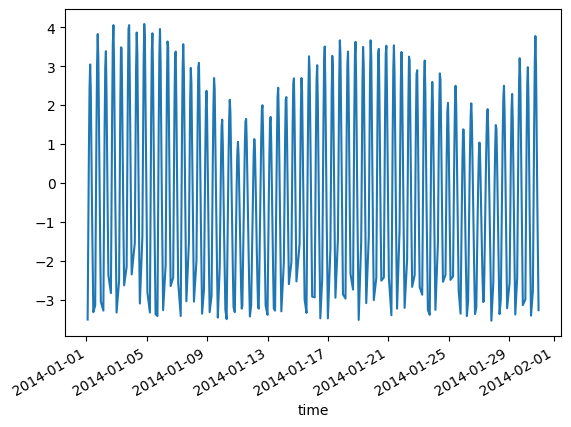

In [4]:
gauge_df.droplevel("site_code").sea_level.plot()

### Modelled tides
We can now model tides for the exact timesteps that we have tide gauge data for using the `eo_tides.model.model_tides` function:

In [5]:
import pandas as pd

from eo_tides.model import model_tides

modelled_df = model_tides(
    x=x,
    y=y,
    time=gauge_df.index.get_level_values("time"),
    directory=directory,
)

# Print outputs
modelled_df.head()

Modelling tides with EOT20


,,,tide_model,tide_height
time,x,y,,
2014-01-01 02:00:00,123.606725,-17.291899,EOT20,-1.407719
2014-01-01 03:00:00,123.606725,-17.291899,EOT20,0.602376
2014-01-01 04:00:00,123.606725,-17.291899,EOT20,2.393473
2014-01-01 05:00:00,123.606725,-17.291899,EOT20,3.396102
2014-01-01 06:00:00,123.606725,-17.291899,EOT20,3.387681


### Validation against GESLA tide gauges
Now we have modelled some tides and loaded some measured sea-level data, we can compare them. 
Note that because the timeseries above is missing some data in late January, we need to "join" our modelled `modelled_df` data to the timesteps present in `gauge_df`.

Now let's generate a scatterplot with our measured data on the x-axis, and our modelled tides on the y-axis:

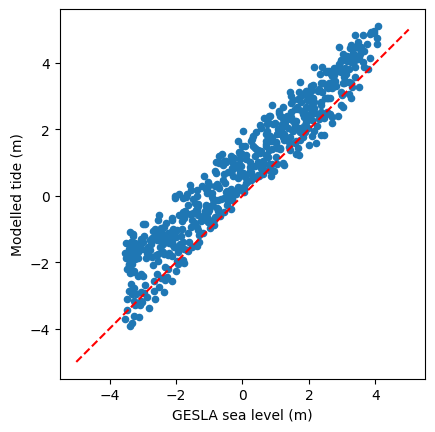

In [6]:
import matplotlib.pyplot as plt

# Join our modelled data to the timesteps in our gauge data
joined_df = gauge_df.join(modelled_df).dropna()

# Plot as a scatterplot with 1:1 line
ax = joined_df.plot.scatter(x="sea_level", y="tide_height")
plt.plot([-5, 5], [-5, 5], c="red", linestyle="dashed")
ax.set_aspect(1.0)
ax.set_ylabel("Modelled tide (m)")
ax.set_xlabel("GESLA sea level (m)");

We can see that both datasets are correlated, although with some visible noise and inaccuracy.
To quantify this, we can use the `eo_tides.validation.eval_metrics` function to compare them and calculate some useful accuracy statistics, including Root Mean Square Error (RMSE), Mean Absolute Error (MAE), R-squared and bias.

Our results show that our modelled tides are highly correlated with observed sea levels at this location, but only accurate to approximately 1 metre RMSE:

In [7]:
from eo_tides.validation import eval_metrics

# Calculate accuracy metrics
accuracy_metrics = eval_metrics(x=joined_df.sea_level, y=joined_df.tide_height)
accuracy_metrics

Correlation         0.961
RMSE                0.968
MAE                 0.816
R-squared           0.923
Bias                0.764
Regression slope    0.942
dtype: float64

### Identifying best local tide models
Because different ocean tide models can perform better or worse in different locations, it can be valuable to compare the accuracy of different models against measured gauge data.
This can help us make an informed decision about the best model to use for a given application or study area.

In the example below, we will use `model_tides` to model tides using three different models: **EOT20**, **GOT5.5**, and **HAMTIDE11**:

In [8]:
models = ["EOT20", "GOT5.5", "HAMTIDE11"]

modelled_df = model_tides(
    x=x,
    y=y,
    time=gauge_df.index.get_level_values("time"),
    model=models,
    output_format="wide",
    directory=directory,
)
modelled_df.head()

Modelling tides with EOT20, GOT5.5, HAMTIDE11 in parallel (models: 3, splits: 1)


100%|██████████| 3/3 [00:00<00:00, 11.82it/s]


Converting to a wide format dataframe


,,tide_model,EOT20,GOT5.5,HAMTIDE11
time,x,y,,,
2014-01-01 02:00:00,123.606725,-17.291899,-1.407719,-1.588029,-0.889604
2014-01-01 03:00:00,123.606725,-17.291899,0.602376,0.137677,-1.101312
2014-01-01 04:00:00,123.606725,-17.291899,2.393473,1.861487,-1.032183
2014-01-01 05:00:00,123.606725,-17.291899,3.396102,3.014030,-0.704035
2014-01-01 06:00:00,123.606725,-17.291899,3.387681,3.211730,-0.204451


We can now merge these modelled tides with our measured gauge data, and plot a comparison of each model against our tide gauge data:

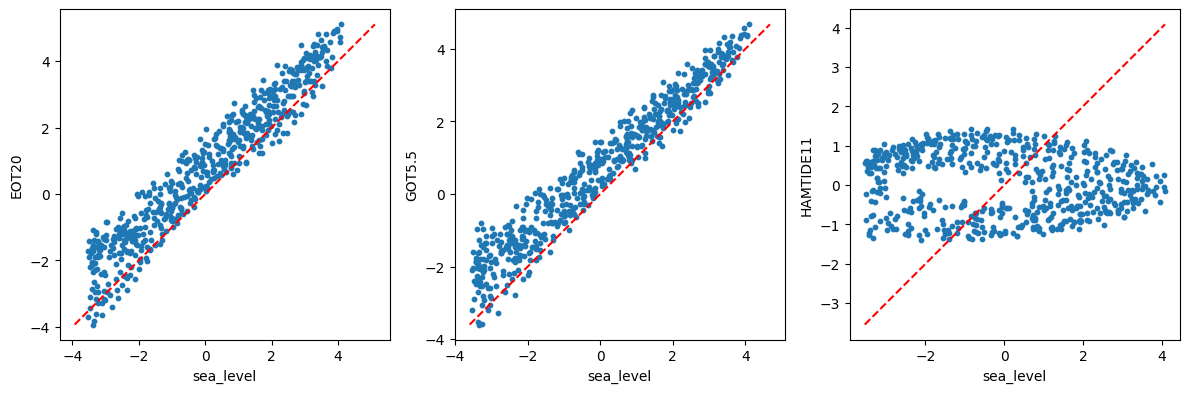

In [9]:
# Join our modelled data to the timesteps in our gauge data
joined_df = gauge_df.join(modelled_df).dropna()

# Plot measured sea levels and modelled data
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for ax, col in zip(axes, models, strict=True):
    joined_df.droplevel(["site_code", "x", "y"]).plot.scatter(x="sea_level", y=col, ax=ax, s=10)
    min_val = min(joined_df["sea_level"].min(), joined_df[col].min())
    max_val = max(joined_df["sea_level"].max(), joined_df[col].max())
    ax.plot([min_val, max_val], [min_val, max_val], c="red", linestyle="dashed")
    ax.set_aspect(1.0)

plt.tight_layout()
plt.show()

Now, we can loop through each of our models and calculate accuracy metrics compared to our gauge data:

In [10]:
# Calculate accuracy metrics for each model and combine into a DataFrame
combined_accuracy_df = pd.DataFrame({
    model: eval_metrics(x=joined_df.sea_level, y=joined_df[model]) for model in models
})

combined_accuracy_df

,EOT20,GOT5.5,HAMTIDE11
Correlation,0.961,0.971,-0.141
RMSE,0.968,0.874,2.377
MAE,0.816,0.726,2.076
R-squared,0.923,0.942,0.020
Bias,0.764,0.697,0.048
Regression slope,0.942,0.888,-0.052


As we can see above, at this location **GOT5.5** has the best overall accuracy as measured by RMSE and MAE, while **HAMTIDE11** was significantly less accurate and uncorrelated with our tide gauge data.

## Tide correlation model rankings

Direct comparison with observed tide gauge data will always be the gold standard for tide model validation.
However, in large-scale coastal remote sensing, analyses are often applied to areas far from any available gauge records.
This makes it challenging to select the most suitable tide model for a given location.

The `eo_tides.validation.tide_correlation` function offers a novel remote sensing–based approach that ranks tide models by how well modelled tides explain patterns of inundation (e.g. wet vs. dry) observed in satellite imagery.
A key advantage of this method is that it can be applied anywhere globally, as long as there is enough intertidal zone for satellites to detect differences in inundation between low and high tide.

In the example below, we run a tide correlation analysis for the same **Derby, Western Australia** location as above.
By default, this analysis loads a large volume of Landsat satellite data from Microsoft Planetary Computer.
To improve performance, we first run several preparatory steps to optimise data loading.

<div class="admonition tip">
    <p class="admonition-title">Tip</p>
    <p>
        The <code>dask.distributed.Client()</code> uses a package called Dask to load data in parallel. This can greatly improve data loading time, particularly on computers with multiple analysis cores.
    </p>
</div>

In [11]:
import logging

import dask.distributed
import odc.stac

from eo_tides.validation import tide_correlation

# Hide excessive logs from Dask
logging.getLogger("distributed").setLevel(logging.ERROR)

# Set up cloud access
odc.stac.configure_s3_access(aws_unsigned=True)

# Start client
client = dask.distributed.Client()
display(client)

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 2
Total threads: 2,Total memory: 7.76 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38011,Workers: 0
Dashboard: http://127.0.0.1:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:45739,Total threads: 1
Dashboard: http://127.0.0.1:38329/status,Memory: 3.88 GiB
Nanny: tcp://127.0.0.1:46447,


Now we have set things up, we can run the `tide_correlation` function.
To improve load times, we only load satellite images with less than 5% cloud cover, and turn off loading Sentinel-2 data.

In [12]:
# Run tide correlation analysis
corr_df, corr_da = tide_correlation(
    x=x,
    y=y,
    directory=directory,
    cloud_cover=5,
    load_s2=False,
)

Found 86 STAC items for landsat-c2-l2
Setting tide modelling location from dataset centroid: 123.61, -17.29
Modelling tides with EOT20, GOT5.5, HAMTIDE11 in parallel (models: 3, splits: 1)


100%|██████████| 3/3 [00:00<00:00, 10.68it/s]
Ignoring read failure while reading: https://landsateuwest.blob.core.windows.net/landsat-c2/level-2/standard/oli-tirs/2022/110/072/LC08_L2SP_110072_20221102_20221114_02_T1/LC08_L2SP_110072_20221102_20221114_02_T1_QA_PIXEL.TIF?st=2025-10-06T05%3A31%3A32Z&se=2025-10-07T06%3A16%3A32Z&sp=rl&sv=2025-07-05&sr=c&skoid=9c8ff44a-6a2c-4dfb-b298-1c9212f64d9a&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2025-10-06T14%3A05%3A49Z&ske=2025-10-13T14%3A05%3A49Z&sks=b&skv=2025-07-05&sig=7Rv1Z9FpRlPL2vzjwCGXLcQ/u9CpPdCiJLqdMyjJWDs%3D:1
/workspaces/eo-tides/.venv/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/workspaces/eo-tides/.venv/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/workspaces/eo-tides/.venv/lib/python3.12/site-packages/dask/_task_spec.py:759: RuntimeWarnin

Our output includes the "correlation" and "rank" of each tide model with a satellite-derived water index (in this case, Normalised Difference Water Index or NDWI).
High correlations indicate that a tide model correctly orders satellite observations by tide height, with high tides consistently wet and low tides consistently dry.

In this location, we can see that our model rankings match the results we got previously for our [tide gauge validation](#identifying-best-local-tide-models): both **EOT20** and **GOT5.5** are correlated with satellite-observed inundation patterns, however the last-ranked **HAMTIDE11** was very poorly correlated:

In [13]:
corr_df

,correlation,rank,x,y,valid_perc
tide_model,,,,,
EOT20,0.424624,2.0,123.606725,-17.291899,0.425489
GOT5.5,0.435037,1.0,123.606725,-17.291899,0.425489
HAMTIDE11,-0.058055,3.0,123.606725,-17.291899,0.425489


The `tide_correlation` function also returns an `xarray.DataArray` showing tide correlations for every satellite pixel around the selected point.
Plotting this output lets us inspect how correlations vary spatially: deep blue indicating pixels where inundation patterns were highly correlated with a tide model, while white and red indicates pixels where tide modelling performance was poor.

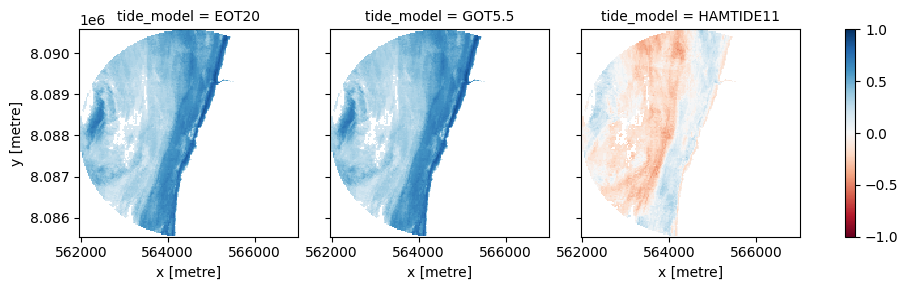

In [14]:
corr_da.plot.imshow(col="tide_model", cmap="RdBu", vmin=-1.0, vmax=1.0)

### Advanced usage

For more advanced use, the tide_correlation function can be run on pre-loaded satellite water index data via the `data` parameter, rather than automatically fetching data from Microsoft Planetary Computer.
This allows tide correlation analyses to be applied to any satellite dataset, for example, Digital Earth Australia or Planet Labs.
When pre-loaded data is supplied, all data loading parameters (`x`, `y`, `time`, `crs`, `buffer` `cloud_cover`, `load_ls`, `load_s2`) are ignored.

```python
# Run tide correlation analysis on pre-loaded satellite data
corr_df, corr_da = tide_correlation(data=pre_loaded_da, ...)
```